# STAT 05 Distributions in Machine Learning

References

My Statistics learning notebook following the live lesson series [**"Probability and Statistics for Machine Learning"**](https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb

## Basic Setup

In [44]:
import math
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import cv2
from IPython.display import HTML, display
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('here')

def set_css():
  display(HTML('''<style> pre { white-space: pre-wrap; } </style>'''))
get_ipython().events.register('pre_run_cell', set_css)

# Shows the image immediately. 
# Resize option available.
# If you are using others' image, you can pass in a string parameter to cite the source.
def show_img(path, resize=None, source=None, source_scale=0.5):
    img = cv2.imread(path)
    if (resize != None):
        img = cv2.resize(img, dsize=(0,0), fx=resize, fy=resize)
    if(source != None):
        cite_source(img, source, scale=source_scale)
    cv2_imshow(img)

# Turns the path into an image object. Resize option available.
def get_img(path, resize=None):
  img = cv2.imread(path)
  if (resize != None):
    img = cv2.resize(img, dsize=(0,0), fx=resize, fy=resize)
  return img

# Puts text of source on the image.
# Avoiding plagiarism and crediting others' hard work is important.
def cite_source(img, source, org=None, scale=0.7, color=1):
    if (org == None):
        img = cv2.putText(img, source, org=(int(np.ceil(img.shape[1]*0.1)), int(np.ceil(img.shape[0]*0.98))),
                          fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=scale, color=1)
    elif (org != None):
        img = cv2.putText(img, source, org=org,
                          fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=scale, color=1)
    return img

# Take notes on a sticky note.
def take_notes(img, source, org, scale=None, color=1, thickness=1):
    if (org == None):
        img = cv2.putText(img, source, org=( int(np.ceil( img.shape[1] * 0.9 )), int(np.ceil( img.shape[0] * 0.1 )) ),
                          fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=scale, color=color, thickness=thickness)
    elif (org != None):
        img = cv2.putText(img, source, org=( int(np.ceil( img.shape[1] * org[0] )), int(np.ceil( img.shape[0] * org[1] )) ),
                          fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=scale, color=color, thickness=thickness)
    return img

def sticky_notes(notes, return_object=False):
    path = "/content/here/MyDrive/Math works/notes.png"    
    sticky_notes = get_img(path, resize=0.65)

    for i, note in enumerate(notes):
        sticky_notes = take_notes(sticky_notes, note, org=(1/17,(i+4)/11), scale=0.5)
    if (return_object == True):
        return sticky_notes
    else:
        cv2_imshow(sticky_notes)

# Code by Bill Grates on Stackoverflow
# https://stackoverflow.com/users/5629538/bill-grates
# https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv

def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

Drive already mounted at here; to attempt to forcibly remount, call drive.mount("here", force_remount=True).


## Sticky Notes for Thoughts

In [ ]:
# display work
notes = ["",
         "",
         "",
         ""]

sticky_notes(notes)

# 5.1 Uniform

The uniform distribution is about as straightforward as they come. It has constant probabilities across the entire range of values in its domain:



Real-world examples include:

    1. Dice rolling (PMF)
    2. Card drawing (PMF)
    3. Model hyperparameters: number of neurons in ANN
    4. Emission of radioactive particles
    5. Economic demand
    6. Analog-to-digital signal quantization errors

- Model hyperparameters: the number of neurons in a artificial neural network in a particular layer or the number of layers in the artificial neural network you might sample from a uniform distribution to figure out the optimal value of a hyperparameter when you're searching over that space. 



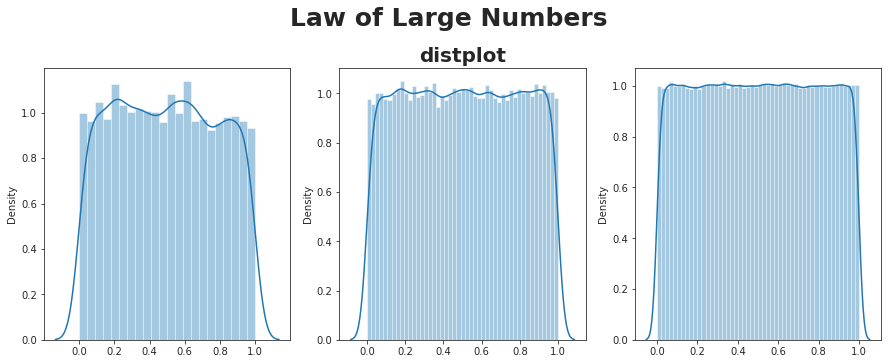

Text(0.5, 1.0, 'histplot')

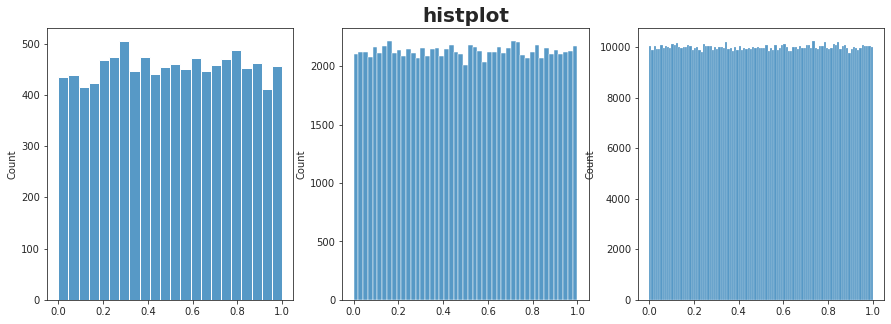

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

size = [10000, 100000, 1000000]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sb.set_style('ticks')
for i in range(len(size)):
    uniform = np.random.uniform(size=size[i])
    sb.distplot(x=uniform, ax=ax[i])
ax[1].set_title('distplot', fontsize=20, fontweight='bold')
plt.suptitle("Law of Large Numbers", fontsize=25, fontweight='bold', y=1.05)
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sb.set_style('ticks')
for i in range(len(size)):
    uniform = np.random.uniform(size=size[i])
    sb.histplot(x=uniform, ax=ax[i])
ax[1].set_title('histplot', fontsize=20, fontweight='bold')

# 5.2 Gaussian: Normal and Standard Normal
(The workhorse of probability theory)

Synonyms: 
- Gaussian distribution
- Normal distribution
- Bell curved distribution

Carl Friedrich Gauss (early 19th c. German mathematician and scientist) is the namesake of over a hundred concepts across mathematics, physics, and astronomy. One of those concepts is the Gaussian distribution, also known as the "bell curve" (though several distributions are bell-shaped) or normal distribution:

    1 : a horse used chiefly for labor as distinguished from driving, riding, or racing. 
    2a(1) : a person who performs most of the work of a group task. 
    (2) : a hardworking person. 
          b : something that is markedly useful, durable, or dependable.

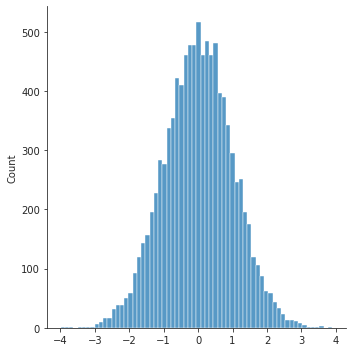

In [ ]:
x = np.random.normal(size=10000)
_ = sb.displot(x)

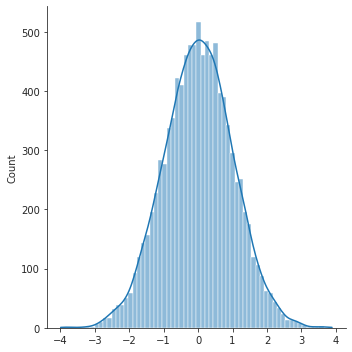

In [ ]:
_ = sb.displot(x, kde=True) # kernel density

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy normal() method...


In [ ]:
# the mean and std of x = np.random.normal(size=10000)
np.mean(x), np.std(x)

(0.012893555293557568, 1.0016095272200976)

**Excerpts from the serise by dr. Jon.**

...it is a standard normal distribution (a.k.a., standard Gaussian distribution). Normal distributions can be denoted with the math calligraphy font as $\mathcal{N}(\mu, \sigma^2)$, thus the standard normal distribution can be denoted as $\mathcal{N}(0, 1)$.

(N.B.: $\sigma^2 = \sigma$ in this case because $1^2 = 1$.)

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:

> *Normal distributions assume the greatest possible uncertainty about the random variable they represent* (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial.

> Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called central limit theorem (covered next) is a critically important concept.

Real-world examples include:

    1. Probability of heads across n tosses (PMF; $n = 5$ earlier, $n = 100$ below)
    2. Sum of di(c)e rolls (PMF)
    3. Height of adult women
    4. Height of adult men
    5. Education test scores, e.g., SAT



In [ ]:
n_experiments = 100000

# a list of 100,000 binomial distributions
heads_count = [np.random.binomial(100, 0.5) for i in range(n_experiments)]
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

Text(0.5, 0, 'Head flips (out of 100 tosses)')

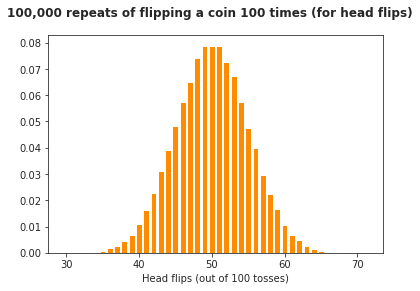

In [ ]:
plt.bar(heads, event_proba, color='darkorange')
plt.suptitle("100,000 repeats of flipping a coin 100 times (for head flips)", fontweight='bold')
plt.xlabel('Head flips (out of 100 tosses)')

# 5.3 The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [ ]:
# len(x): 10000
# x: array([-1.29024778,  0.4520189 ,  0.11978634, ...,  0.9696171 , -0.47123854,  0.87439594])

x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([ 2.9074342 ,  0.3872407 ,  0.1870799 , -1.86376308, -0.49910657,
       -1.24693599, -0.73445673, -0.70452945,  1.47112885,  0.54587952])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [ ]:
np.mean(x_sample)

0.04499713430284554

### Plotting distribution

In [ ]:
def plot_distributions(dataset, xlim, title, color='green', axvline=False):
    fig, ax = plt.subplots(2, 3, figsize=(24, 12))

    dataset_mean = np.mean(dataset)

    idx = 0
    for i in range(2):
        for j in range(3):
            sb.histplot(sample_mean_calculator(dataset, sample_size[idx], 1000), ax=ax[i][j], color=color, kde=True)
            if (axvline == True):
                ax[i][j].axvline(dataset_mean, linewidth=1.5, color='black')
                ax[i][j].set_xlim(xlim[0], xlim[1])
                idx += 1
    fig.suptitle(title, fontsize=25, fontweight='bold')

## CTL on Normal Distribution

0th trial with sample size 10: 0.0099
1th trial with sample size 50: 0.2421
2th trial with sample size 100: -0.0335
3th trial with sample size 500: -0.0473
4th trial with sample size 1000: 0.0176
5th trial with sample size 5000: 0.0239


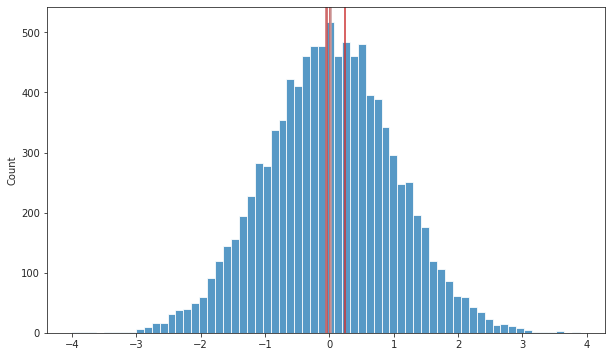

In [ ]:
sample_size = [10, 50, 100, 500, 1000, 5000]

sample_means = []

for i, size in enumerate(sample_size):
    x_sample = np.random.choice(x, size=size, replace=False)
    sample_means.append(np.mean(x_sample))
    print(f'{i}th trial with sample size {size}: {np.round(np.mean(x_sample), 4)}')

index = np.arange(10, 70, 10)
fig, ax = plt.subplots(figsize=(10, 6))
sb.histplot(x, ax=ax)
for i, mean in enumerate(sample_means):
    ax.axvline(x=mean, color=(0.8, index[i]*0.01, index[i]*0.01))

In [ ]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

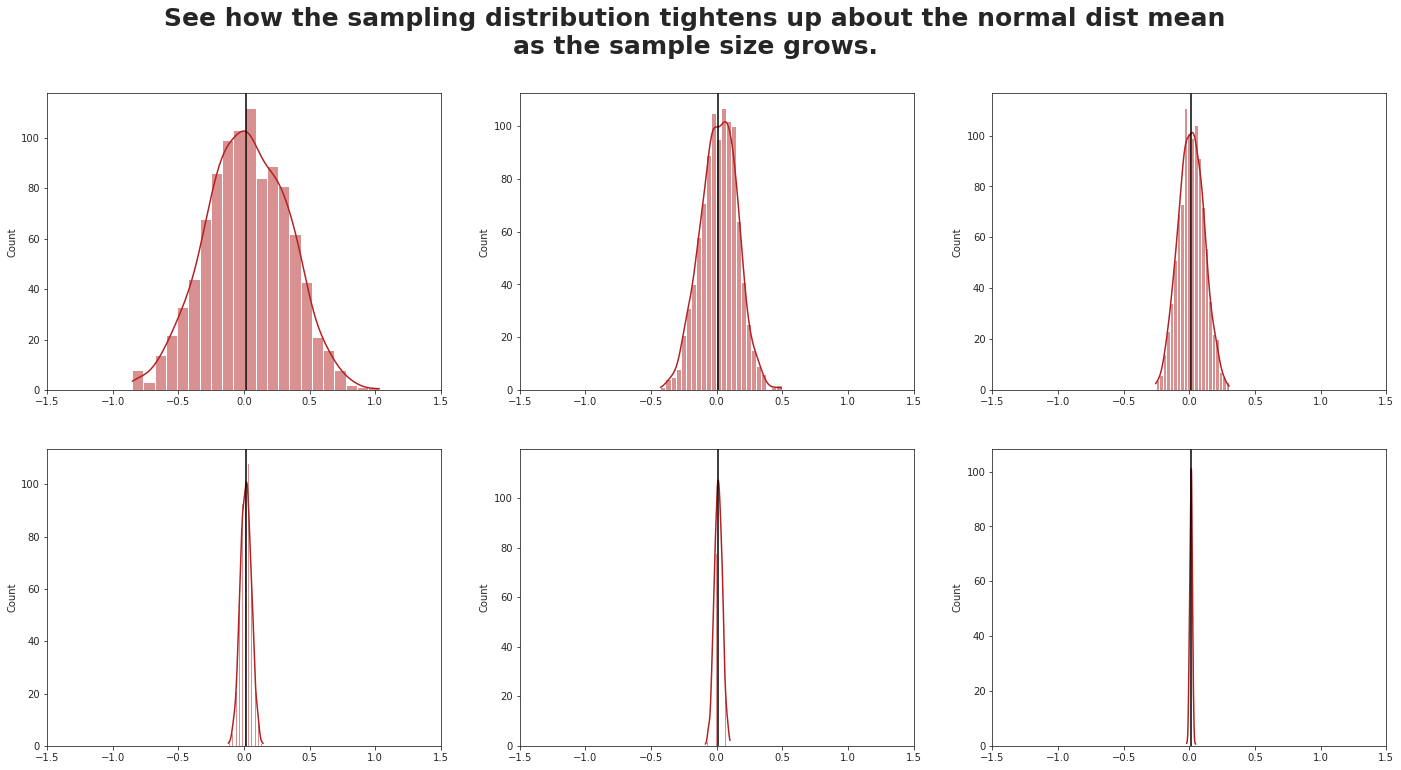

In [ ]:
title = "See how the sampling distribution tightens up about the normal dist mean\nas the sample size grows."
plot_distributions(x, (-1.5, 1.5), title, color='firebrick', axvline=True)

## CTL on Skewed Distribution

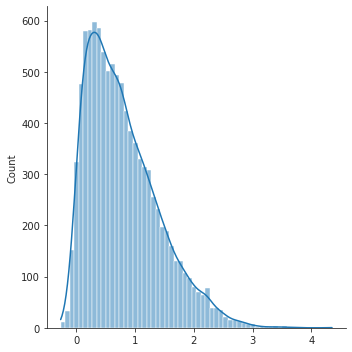

In [ ]:
import scipy.stats as st

s = st.skewnorm.rvs(10, size=10000)
sb.displot(s, kde=True)

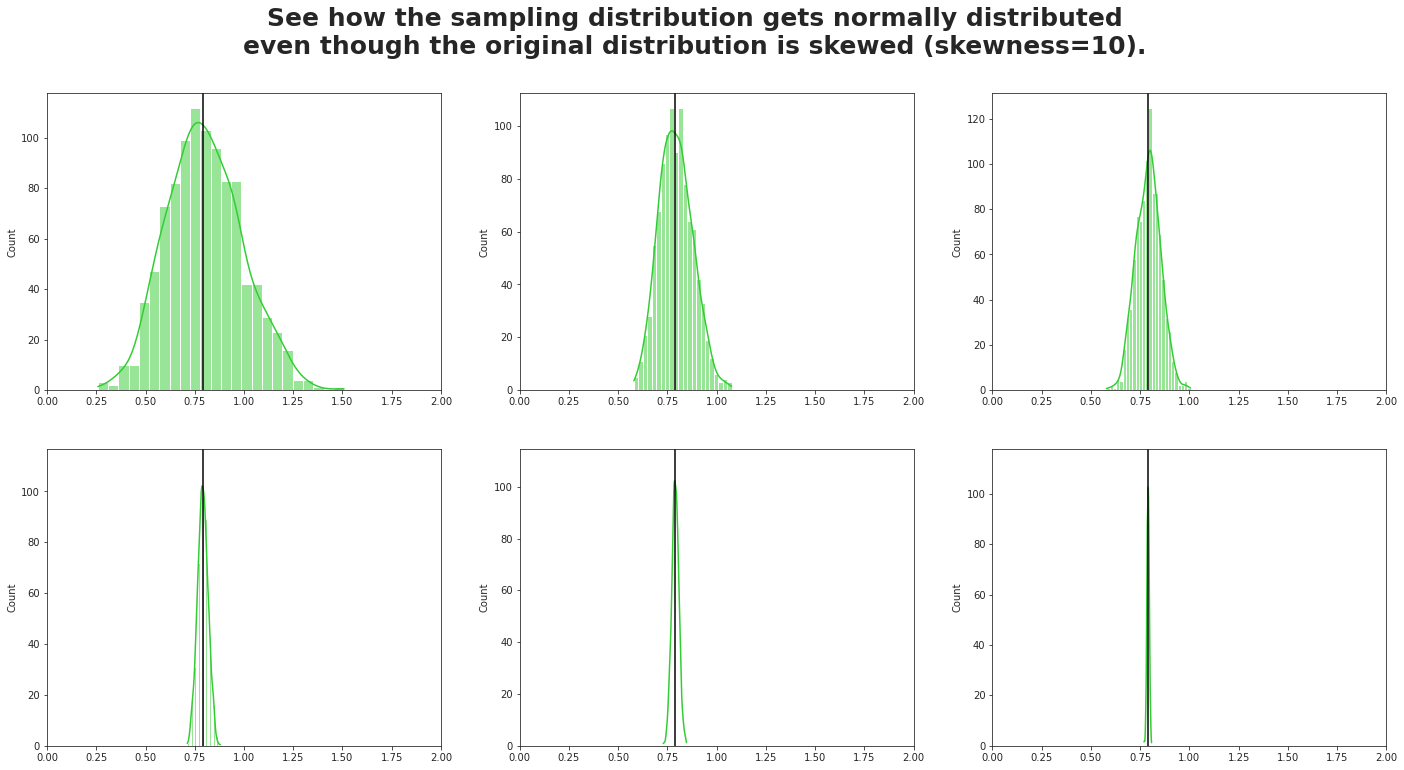

In [ ]:
title = "See how the sampling distribution gets normally distributed\neven though the original distribution is skewed (skewness=10)."
plot_distributions(s, (0,2), title, color='limegreen', axvline=True)

## CTL on Multimodal Distribution
- Create two different normal distributions each with 5,000 data points in it. 
- One of them is a standard normal distribution with a mean of zero, and the other one with mean of 4.




In [ ]:
# loc means the mean value. 
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc=4.0, size=5000)))
m

array([-0.05672515,  0.18349348,  0.55861751, ...,  3.27244741,
        3.15212855,  4.23940875])

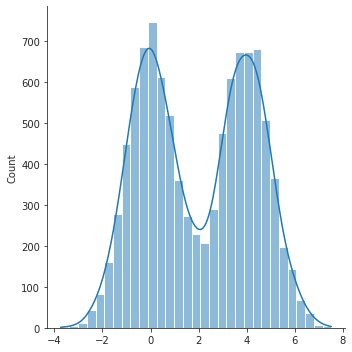

In [ ]:
sb.displot(m, kde=True)

In [ ]:

m_mean

1.99578132644613

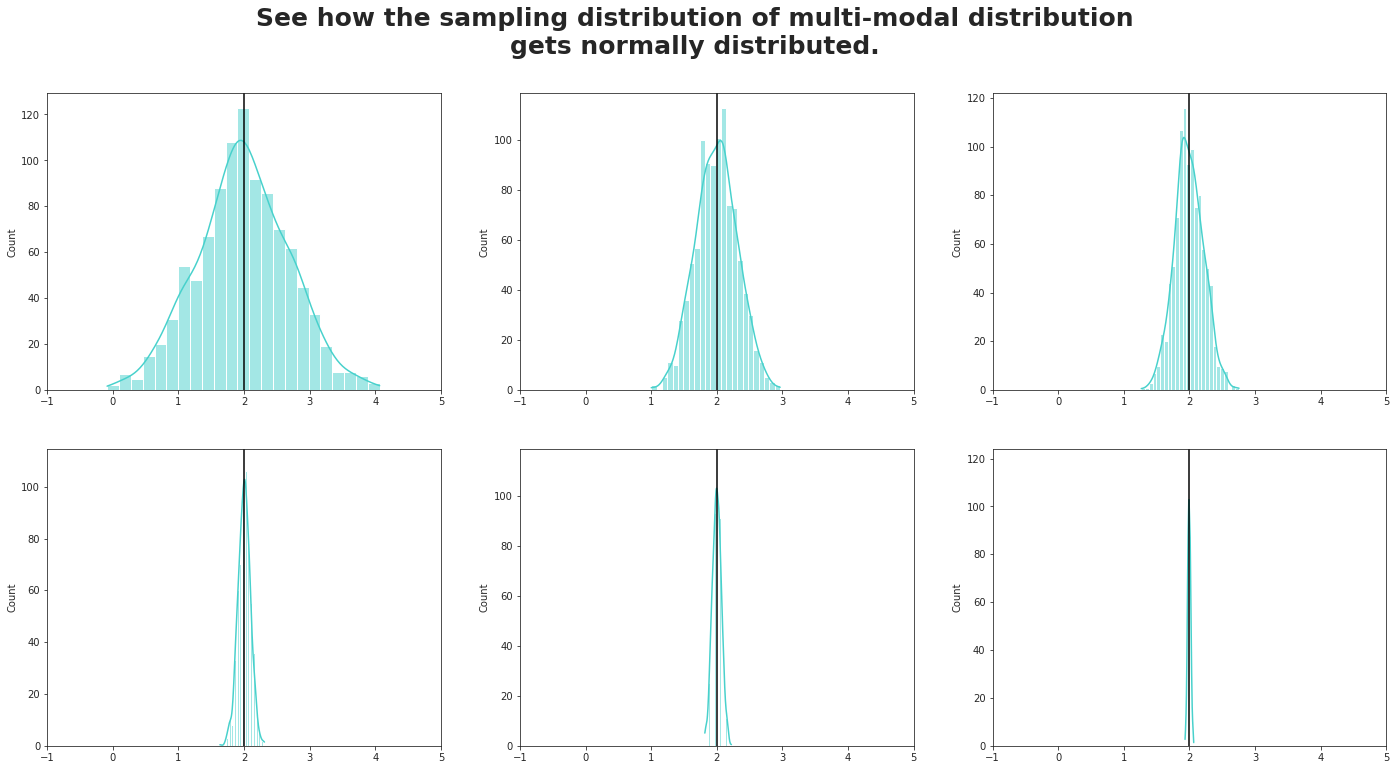

In [ ]:
title = "See how the sampling distribution of multi-modal distribution\ngets normally distributed."
plot_distributions(m, (-1,5), title, color='mediumturquoise', axvline=True)

## CTL on Uniform Distribution

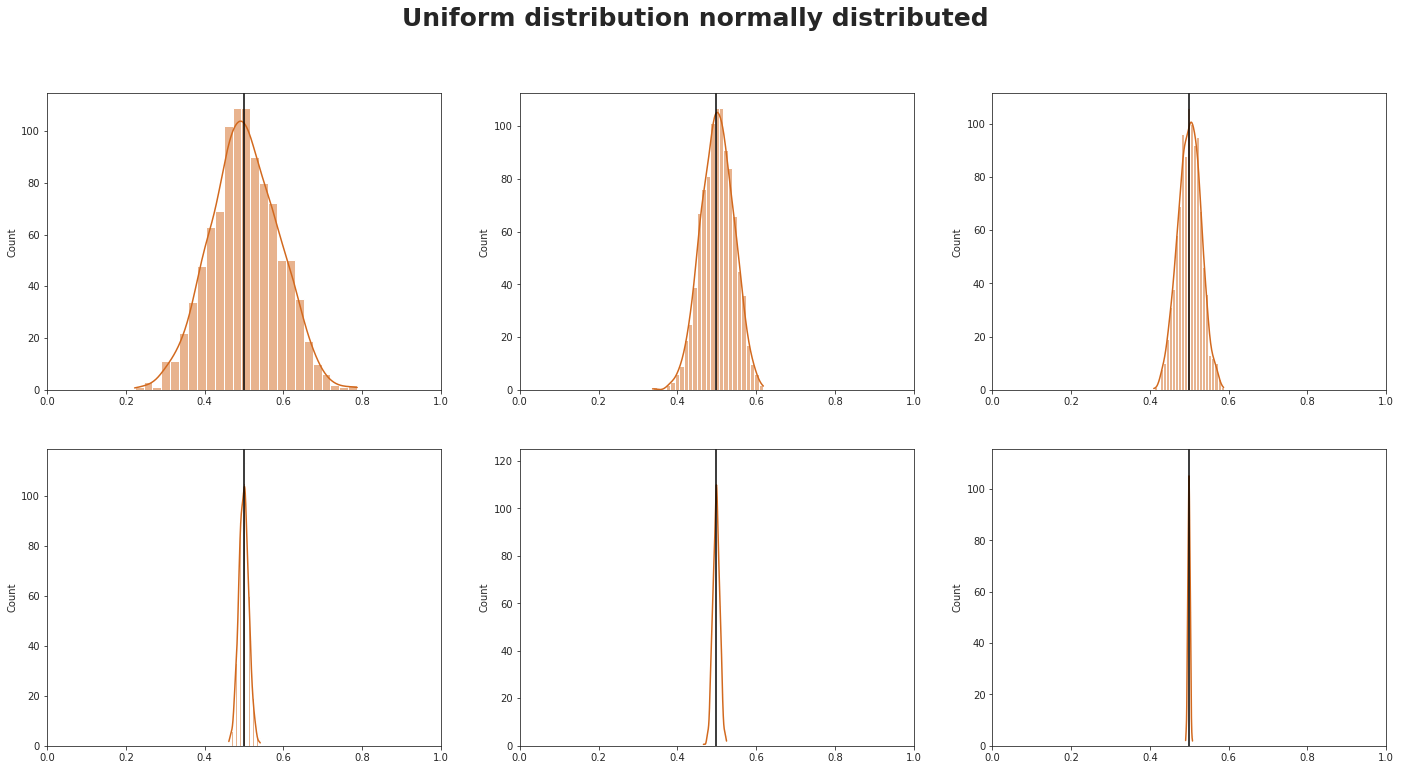

In [ ]:
u = np.random.uniform(size=10000)
title = "Uniform distribution normally distributed"
plot_distributions(u, (0,1), title, color='chocolate', axvline=True)

# 5.4 Log-Normal

The natural logarithm of the log-normal distribution is normally distributed:

Real world examples of log-normal distribution
- Income
- Lengths of comments in onlnie forums
- Duraton of chess games
- Duration of Rubik's cube solves
- Size of publicly available video files
- Number of hospitalized cases in an epidemic where public interventions are involved.

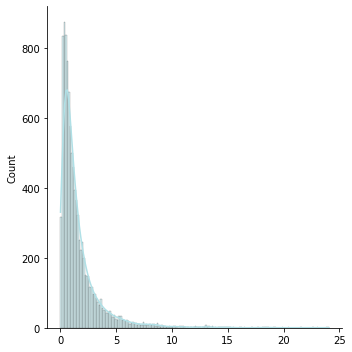

In [6]:
x = np.random.lognormal(size=10000)   # defaults to standard normal mu=0, sigma=1
sb.displot(x, kde=True, color='powderblue')

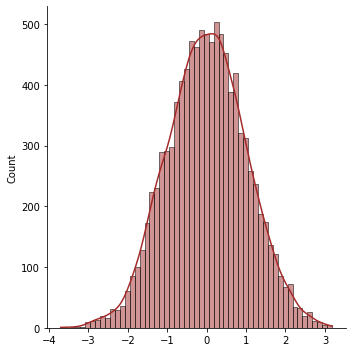

In [7]:
sb.displot(np.log(x), color='brown', kde=True)

# 5.5 Exponential and Laplace
Relatively squished up against zero and then decreases exponentially toward higher values. Log-normal distribution, in contrast, could take negative values and both increases and decreases.

Real-world examples:

    Time between requests to access Wikipedia pages
    Used frequently in deep learning



### Exponential

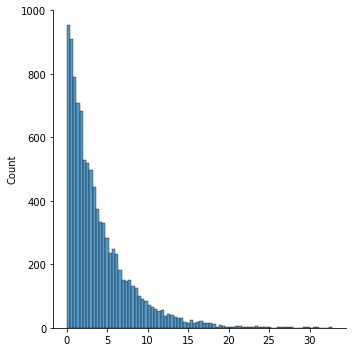

In [13]:
x = np.random.exponential(scale=4, size=10000) # "scale" parameter defaults to one
sb.displot(x)

The logarithm of an exponential distribution is skewed, where as the logarithm of a log-normal distribution is normally distributed.  

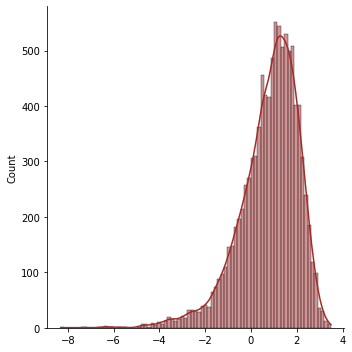

In [14]:
# Its logarithm has a skewed distribution:
sb.displot(np.log(x), color='brown', kde=True)

### LaPlace
Named after Pierre-Simon Laplace, the key figure in the development of Bayesian statistics.

Real-world examples:

- Extreme weather events, e.g., maximum rainfall in a day
- Many machine learning applications; wherever an acute peak of probability is desired



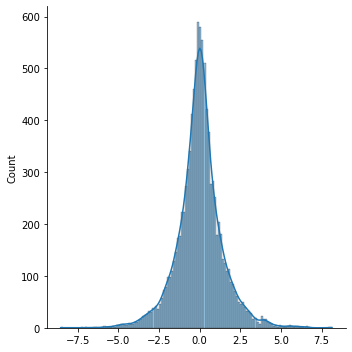

In [15]:
x = np.random.laplace(size=10000)
sb.displot(x, kde=True)  # Alternatively referred to as the "double exponential distribution":

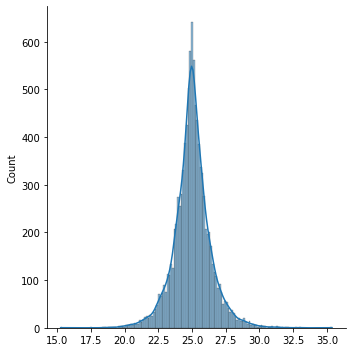

In [16]:
sb.displot(np.random.laplace(loc=25, size=10000), kde=True)

# 5.6 Binomial and Multinomial

All distributions so far have been for continuous variables (PDFs). This one is discrete (PMF).

We've already been using it for coin flips; it's used for binary (0 or 1) outcome.

Its parameters are:

- n: number of trials
- p: probability of outcome of 1
- size: number of experiments with n trials each



## Bernoulli
Technically, binomial distributions are created by sampling $n > 1$ "Bernoulli trials". The Bernoulli distribution is equivalent to the binomial distribution where $n=1$:

- Bernoulli distribution: single binomial trial
- Binomial distribution: multiple Bernoulli trials

Real-world examples (binary outcome):

- Making it to work on time (it works or not)
- Candidate being invited to interview (invited or not)
- Epidemiology: probability of death or catching disease (catching it or not)



In [26]:
# Bernoulli trial
np.random.binomial(1, 0.5)

1

## Binomial

In [ ]:
n = 5
n_experiments = 1000 

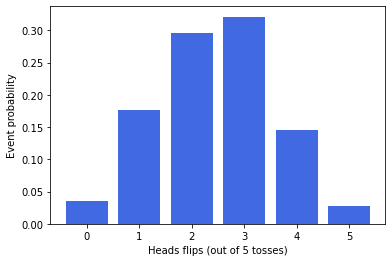

In [19]:
# Fair coin (p = 0.5)
heads_count = np.random.binomial(n, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

plt.bar(heads, event_proba, color='royalblue')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

Weighted coin (p = 0.8)

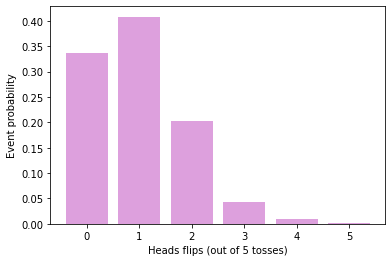

In [21]:
heads_count = np.random.binomial(n, 0.2, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

plt.bar(heads, event_proba, color='plum')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

## Multinomial

Generalization of the binomial distribution to discrete random variables with more than two possible outcomes, e.g., the roll of a die:

**Multinomial distribution is uniformly distributed.**

[178 161 152 169 184 156]


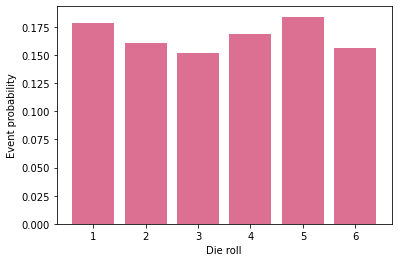

In [28]:
n = 1000
rolls = np.random.multinomial(n, [1/6.]*6)
print(rolls)

event_proba = rolls/n

plt.bar(range(1, 7), event_proba, color='palevioletred')
plt.xlabel('Die roll')
_ = plt.ylabel('Event probability')

Uniform distribution is intended for probability mass functions, for discrete random variables. 

<br/>

As in the binomial case, multinomial distributions are created by sampling $n > 1$ multinoulli distributions, where the multinoulli distribution is equivalent to the multinomial distribution when $n=1$:

In [29]:
np.random.multinomial(1, [1/6.]*6)

array([0, 1, 0, 0, 0, 0])

multinomial distributions are created by sampling a bunch of these single multinoulli distributions. Since multinomial distributions can represent any categorical variable for example, a burger, a hot dog or pizza, or the 52 playing cards in a deck or all of the teams in the NFL, the National Football League, not just integer values. We can't always calculate an expected value like we can when we use a multinoulli distribution or a multinomial distribution to model dice rolls.

# 5.7 Poisson
Arguments:
- $\lambda$: must be greater than zero and guides peak of probability distribution. E.g., sampling from Poisson with $\lambda=5$ will tend to draw samples near 5



In [2]:
lam = 5
n = 1000
samples = np.random.poisson(lam, n)
samples[0:20]

array([5, 7, 5, 4, 3, 2, 5, 9, 2, 2, 3, 2, 6, 4, 6, 5, 5, 4, 4, 2])

In [3]:
x, x_count = np.unique(samples, return_counts=True)
x, x_count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([  6,  36,  76, 119, 184, 184, 149, 114,  60,  40,  24,   6,   2]))

In [4]:
Px = x_count/n
Px

array([0.006, 0.036, 0.076, 0.119, 0.184, 0.184, 0.149, 0.114, 0.06 ,
       0.04 , 0.024, 0.006, 0.002])

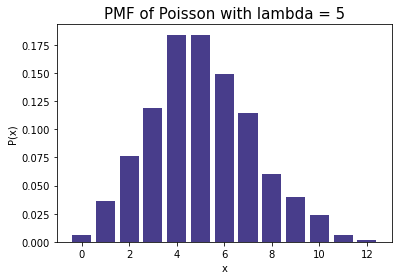

In [10]:
plt.bar(x, Px, color="darkslateblue")
plt.title(f'PMF of Poisson with lambda = {lam}', fontsize=15)
plt.xlabel('x', fontsize=10)
_ = plt.ylabel('P(x)', fontsize=10)

# 5.8 Mixture Distributions

Adapted from [Stack Overflow](https://stackoverflow.com/questions/47759577/creating-a-mixture-of-probability-distributions-for-sampling) post:

Multinomial distribution (driven by np.random.choice()) with probabilities set by coefficients array determines which of the three distributions to sample from.


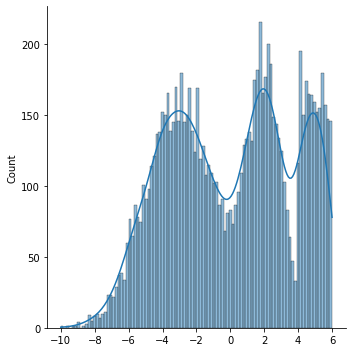

In [56]:
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}},
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},
]

coefficients = np.array([0.5, 0.2, 0.3])
coefficients /= coefficients.sum()      # in case these did not add up to 1
sample_size = 10000

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])

random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
_ = sb.displot(sample, bins=100, kde=True)

In [64]:
data

array([[-1.82150218,  4.67821391,  1.32608626],
       [-0.30388126,  4.55173504,  2.55141515],
       [-3.69028707,  5.1322271 ,  3.44874513],
       ...,
       [-2.15739972,  4.41728755,  2.26267145],
       [-3.65264657,  5.21112245,  2.27230987],
       [-3.09599465,  4.3510543 ,  2.18535001]])

(-0.5, 475.5, 247.5, -0.5)

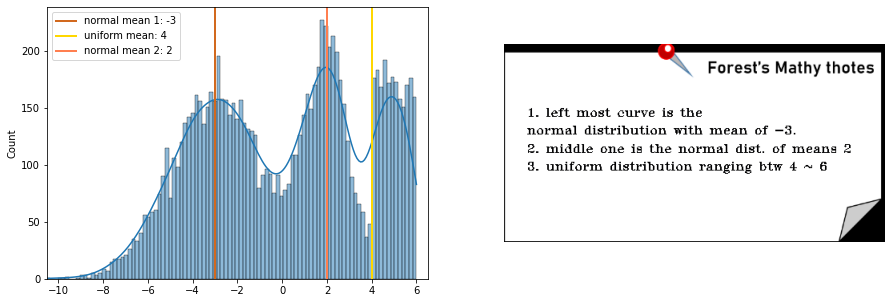

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the mixture
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}}, # mean -3, std 2
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},  # ranges between 4 ~ 6
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},  # mean 2, std 1
]

normal_mean1 = distributions[0]["kwargs"]['loc']
uniform_mean = distributions[1]["kwargs"]['low']
normal_mean2 = distributions[2]["kwargs"]['loc']

means = [normal_mean1, uniform_mean, normal_mean2]
means_label = ["normal mean 1", "uniform mean", "normal mean 2"]
means_color = ["chocolate", "gold", "coral"]

coefficients = np.array([0.5, 0.2, 0.3]) # relative proportion of each distribution in the mixture.
coefficients /= coefficients.sum()       # in case these did not add up to 1
sample_size = 10000

num_distr = len(distributions) 
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])

random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
sb.histplot(sample, bins=100, kde=True, ax=ax[0])

ax[0].set_xlim(-10.5, 6.5)
for i in range(3):
    ax[0].axvline(means[i], label=f'{means_label[i]}: {means[i]}', color=means_color[i], linewidth=2)
ax[0].legend()

notes = ["1. left most curve is the ",
         "normal distribution with mean of -3.",
         "2. middle one is the normal dist. of means 2",
         "3. uniform distribution ranging btw 4 ~ 6"]

img = sticky_notes(notes, return_object=True)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
ax[1].imshow(img)
ax[1].axis('off')

# 5.9 Preprocessing Data for Model Input
- Most popular statistical models are "parametric", meaning they assume normally-distributed inputs:
  - **Box-Cox** transformation adjusts toward normal.
- Standard normal is ideal in ML:
  - Subtract mean (adjust $\mu$ to 0)
  - divide by standard deviation (adjusts $\sigma$ to 1)
  - (In neural network architecture, we can pass inputs through batch normalisation layer).
  - Encode binary variables as 0 or 1.

# 5.10 Exercises

a. Gaussian  
b. Log-normal  
c. Poisson  
d. Multinomial
e. Mixture

1. Which distribution is best-suited to representing the weight of year-old babies?  
a. Gaussian

2. ...the number of pupies at doggy day care?   
c. Poisson  

3. ... the height of adults?   
a. Gaussian


---


2. we can definitely exclude the Gaussian distribution because that's a PDF (density) intended for continuous random variables and this is a discrete number of puppies. Poisson is the right choice because we're counting how many puppies show up at daycare. 

3. the mean of the height for men is different from the mean of the height for women, and so we can't represent that effectively with a single Gaussian model. We should use a mixture model, which would probably be composed of two Gaussian distributions, so the correct answer is C.

# Frequent Functions
**Distributions**
- Normal
    - `np.random.normal(size=10000)`
    - `np.random.normal(loc=set mean value, size=size)))`
- Skewed
    - `st.skewnorm.rvs(10, size=10000)`
    - `import scipy.stats as st`
- Multimodal
  - `np.concatenate((np.random.normal(size=5000), np.random.normal(loc=4.0, size=5000)))`
- Uniform
    - `np.random.uniform(size=10000)`
- Log-normal
  - `np.random.laplace(size=10000)`
- Binomial
  - `np.random.binomial(1, prob)`: Bernoulli
  - `np.random.binomial(trials, prob, experiments)`
- Multinomial
  - `np.random.multinomial(1, [1/6.]*6)`: Mutinoulli
  - `np.random.multinomial(n, [1/6.]*6)`
- Poisson
  - `samples = np.random.poisson(lam, n)`

<br/>

- `sb.set_style('ticks')`
    - `sb.distplot(x=uniform)`: to be deprecated.
    - `sb.displot(x=uniform)`
    - `sb.histplot(x=data, ax=ax)`


# Error Notes 

- `sb.distplot(x=data, ax=ax[i])` 
> /usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

- `sb.displot(x=data, ax=ax)`
> /usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)